#### R<sub>SU</sub> = α × R<sub>SD</sub>

R<sub>SD</sub> is Downwelling Shortwave Radiation from AMATERASS (W/m<sup>2</sup>)<br>
α is Albedo from ERA5

In [1]:
import os
import numpy
import matplotlib.pyplot as plt

In [2]:
def read_site_csv(csv_filename):
    csv_data = numpy.genfromtxt(csv_filename, delimiter=',', dtype=str)
    csv_v = csv_data[:, 1]
    csv_v = csv_v.astype(float)
    return csv_data[:, 0], csv_v


def calculate_r_su(alpha, r_sd):
    r_su = alpha * r_sd
    return r_su

In [3]:
site_infos = [# site, lat, lon, UTC+
    ["CLC", 44.59666667, 123.4702778, 8],
    ["JRC", 31.80683056, 119.2172639, 8],
    ["PDC", 26.6, 106.3166667, 8],
    ["PJC", 40.94138889, 121.9602778, 8],
    ["HZF", 51.78111111, 121.0177778, 8],
    ["ZAG", 32.8, 102.55, 8],
    ["DBB", 41.64397222, 110.3314722, 8],
    ["HBG", 37.61666667, 101.3166667, 8],
    ["MPM", 22.4982, 114.0292, 8],
    ["BBY", 43.323, 141.8107, 9],
    ["TKY", 36.14616667, 137.4231111, 9],
    ["CRK", 38.20138889, 127.2505556, 9],
    ["GCK", 37.74833333, 127.1622222, 9],
    ["GDK", 37.74888889, 127.1491667, 9],
    ["SIP", 0.395204167, 102.7645506, 7],
    ["SDP", 0.699491389, 102.793305, 7],
    ["ASM", -22.2828, 133.2493, 9],
    ["CPW", -33.6152, 150.7236, 11],
    ["WAR", -43.095, 146.6545, 11]
]

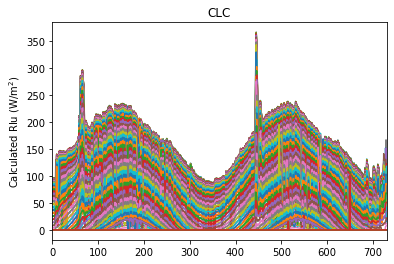

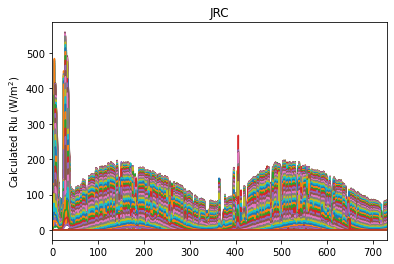

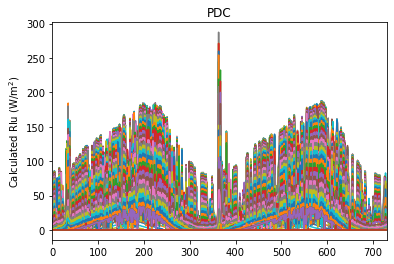

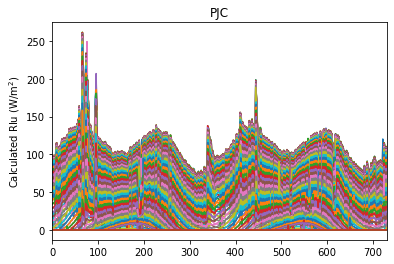

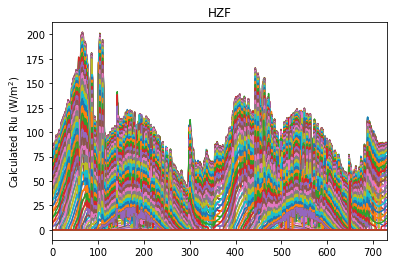

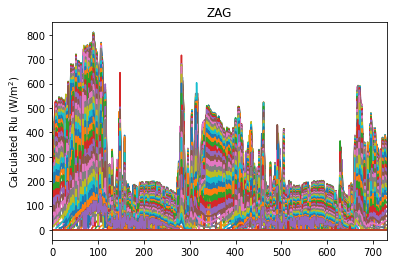

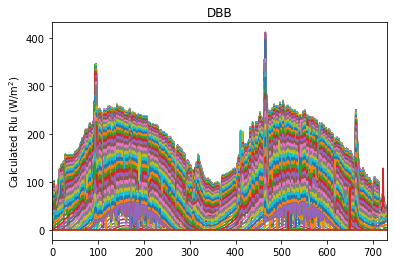

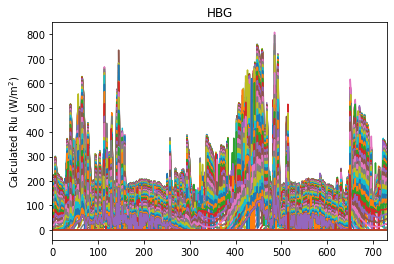

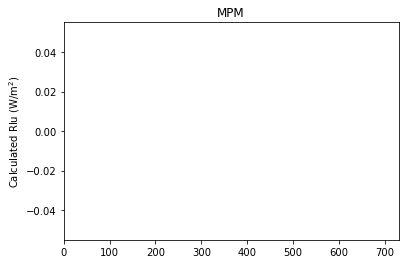

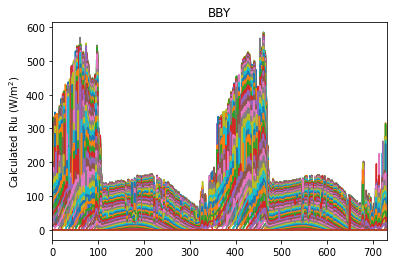

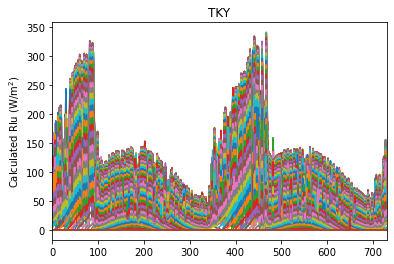

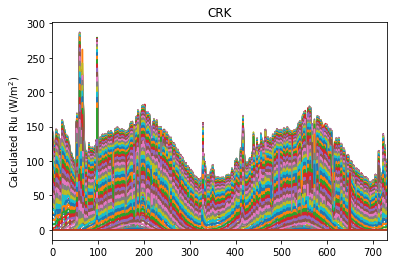

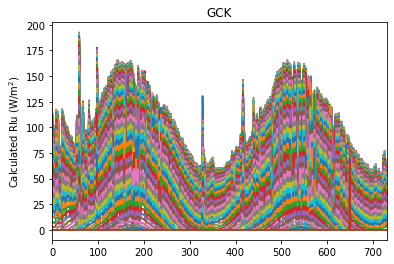

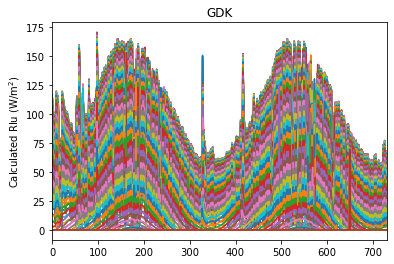

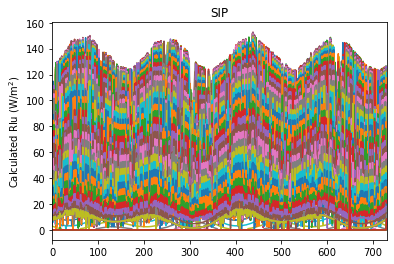

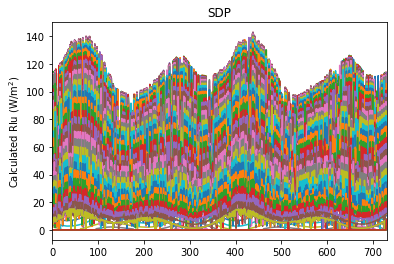

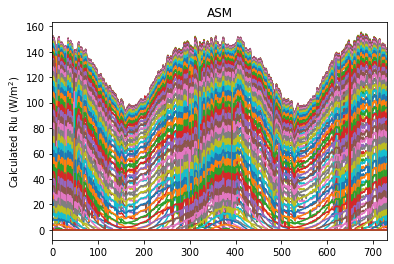

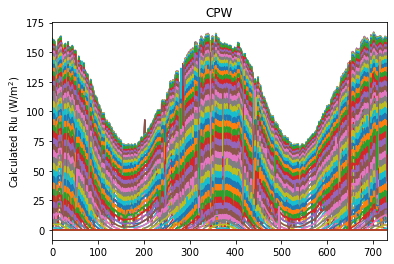

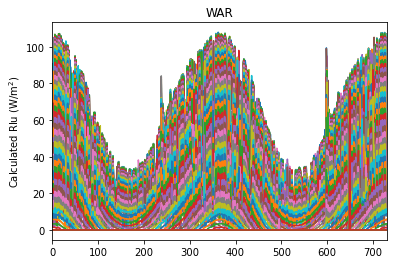

<Figure size 432x288 with 0 Axes>

In [5]:
WORKSPACE_FOLDER = os.path.join(os.path.abspath('..'), 'processing_record')
if not os.path.exists(WORKSPACE_FOLDER):
    os.makedirs(WORKSPACE_FOLDER)

for i, site_info in enumerate(site_infos):
    site_name = site_info[0]
    
    Rsd_SITE_CSV = os.path.join(WORKSPACE_FOLDER, site_name + '_AMATERASS_Rsd.csv')
    r_sd_timelist, r_sd_10min = read_site_csv(Rsd_SITE_CSV)
    Albedo_SITE_CSV = os.path.join(WORKSPACE_FOLDER, site_name + '_ERA5_Albedo.csv')
    albedo_timelist, albedo_10min = read_site_csv(Albedo_SITE_CSV)
    r_su_10min = calculate_r_su(albedo_10min, r_sd_10min)
    
    r_su_record = r_su_10min.astype(str)
    r_su_csv_ = numpy.column_stack((r_sd_timelist, r_su_record))
    numpy.savetxt(os.path.join(WORKSPACE_FOLDER, site_name+'_Rsu'+'.csv'), r_su_csv_, delimiter=",", fmt='%s')

    data_day = r_su_10min.reshape(365 * 2, 24 * 6)
    
    plt.title(site_name)
    plt.plot(numpy.arange(365 * 2), data_day)
    plt.xlim(0, 365 * 2)
    plt.ylabel('Calculated Rlu (W/m$^{2}$)')
    plt.show()
    plt.clf()